# Data Cleaning of NYC Airbnb Dataset

Data Cleaning of NYC Airbnb Dataset by Fedy Rahmatullah as the first case study on RevoU mini Course

In [39]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
inn = pd.read_csv('NYC AirBnB Dummy Data - DAMC_C.csv', sep=';', encoding ='unicode_escape')
inn.head()

,listing_id,description,room_type,price,neighborhood_full,host_name,last_review
0,2595,Skylit Midtown Castle,Entire home/apt,225 dollars,"Manhattan, Midtown",Jennifer,21/05/2021
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt,89 dollars,"Brooklyn, Clinton Hill",LisaRoxanne,21/07/2005
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,200 dollars,"Manhattan, Murray Hill",Chris,21/06/2022
3,5178,Large Furnished Room Near B'way,private room,79 dollars,"Manhattan, Hell's Kitchen",Shunichi,21/06/2024
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,150 dollars,"Manhattan, Chinatown",Ben,21/06/2009


In [41]:
inn.dtypes

listing_id            int64
description          object
room_type            object
price                object
neighborhood_full    object
host_name            object
last_review          object
dtype: object

In [42]:
inn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   listing_id         24999 non-null  int64 
 1   description        24999 non-null  object
 2   room_type          24999 non-null  object
 3   price              24999 non-null  object
 4   neighborhood_full  24999 non-null  object
 5   host_name          24991 non-null  object
 6   last_review        24999 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [43]:
inn.isna().sum() 

listing_id           0
description          0
room_type            0
price                0
neighborhood_full    0
host_name            8
last_review          0
dtype: int64

In [44]:
inn[inn.isnull().any(axis=1)] #menampilkan data null

,listing_id,description,room_type,price,neighborhood_full,host_name,last_review
263,100184,Bienvenue,private room,50 dollars,"Queens, Queens Village",NaN,21/07/2008
3040,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,Private room,86 dollars,"Manhattan, Harlem",NaN,21/05/2023
4039,6292866,Modern Quiet Gem Near All,entire home/apt,85 dollars,"Brooklyn, East Flatbush",NaN,21/06/2019
4269,6786181,R&S Modern Spacious Hideaway,Entire home/apt,100 dollars,"Brooklyn, East Flatbush",NaN,21/06/2019
6338,12113879,"Sunny, Large West Village 1 BR Near Everything",Entire home/apt,220 dollars,"Manhattan, Chelsea",NaN,21/07/2002
8060,15648096,Spacious 2 bedroom close to Manhattan,Entire home/apt,75 dollars,"Bronx, Highbridge",NaN,21/07/2007
12128,21867710,Amazing room in the centre on Manhatten! Welcome!,Private room,120 dollars,"Manhattan, Hell's Kitchen",NaN,21/01/2001
12164,21901156,Best Deal! Lovely place in Manhattan! Time Squ...,Private room,120 dollars,"Manhattan, Hell's Kitchen",NaN,21/01/2001


In [45]:
inn = inn.copy()
# inn.dropna(axis=0, inplace=True) #menghapus data dengan nilai null
inn.fillna({'host_name':0}, inplace=True)
inn

,listing_id,description,room_type,price,neighborhood_full,host_name,last_review
0,2595,Skylit Midtown Castle,Entire home/apt,225 dollars,"Manhattan, Midtown",Jennifer,21/05/2021
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt,89 dollars,"Brooklyn, Clinton Hill",LisaRoxanne,21/07/2005
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,200 dollars,"Manhattan, Murray Hill",Chris,21/06/2022
3,5178,Large Furnished Room Near B'way,private room,79 dollars,"Manhattan, Hell's Kitchen",Shunichi,21/06/2024
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,150 dollars,"Manhattan, Chinatown",Ben,21/06/2009
...,...,...,...,...,...,...,...
24994,35865346,Spacious Modern Apt. Near JFK Airport and Trains,ENTIRE HOME/APT,129 dollars,"Queens, Jamaica",Sharon,21/07/2007
24995,35865788,Brand new 1Bedroom apartment with private terrace,Entire home/apt,175 dollars,"Queens, Long Island City",Kasper,21/06/2023
24996,35866165,A Place to stay in Brooklyn,ENTIRE HOME/APT,150 dollars,"Brooklyn, Borough Park",Mord,21/07/2001
24997,35867917,"Updated Studio apartment, clean and fresh",Entire home/apt,99 dollars,"Brooklyn, Bushwick",Sadie,21/07/2005


In [46]:
inn.isna().sum() 

listing_id           0
description          0
room_type            0
price                0
neighborhood_full    0
host_name            0
last_review          0
dtype: int64

In [47]:
inn.describe()

,listing_id
count,2.499900e+04
mean,2.056006e+07
std,1.098472e+07
min,2.595000e+03
25%,1.187292e+07
50%,2.225188e+07
75%,3.025357e+07
max,3.586792e+07


**Mengubah tipe data dari price ke integer**

In [48]:
inn['price'] = inn['price'].str.strip(' dollars')

In [49]:
inn['price'] = inn['price'].astype('int')
inn.dtypes

listing_id            int64
description          object
room_type            object
price                 int32
neighborhood_full    object
host_name            object
last_review          object
dtype: object

In [50]:
inn['price'].sum()

3547146

In [51]:
inn.head()

,listing_id,description,room_type,price,neighborhood_full,host_name,last_review
0,2595,Skylit Midtown Castle,Entire home/apt,225,"Manhattan, Midtown",Jennifer,21/05/2021
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt,89,"Brooklyn, Clinton Hill",LisaRoxanne,21/07/2005
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,200,"Manhattan, Murray Hill",Chris,21/06/2022
3,5178,Large Furnished Room Near B'way,private room,79,"Manhattan, Hell's Kitchen",Shunichi,21/06/2024
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,150,"Manhattan, Chinatown",Ben,21/06/2009


**Membuat semua kategori di room_type capitalize each word**

In [52]:
inn.room_type.unique()

array(['Entire home/apt', 'private room', 'Private room',
       'entire home/apt', 'PRIVATE ROOM', 'shared room',
       'ENTIRE HOME/APT', 'Shared room', 'SHARED ROOM'], dtype=object)

In [53]:
inn['room_type'] = inn['room_type'].str.title()
inn.head()

,listing_id,description,room_type,price,neighborhood_full,host_name,last_review
0,2595,Skylit Midtown Castle,Entire Home/Apt,225,"Manhattan, Midtown",Jennifer,21/05/2021
1,3831,Cozy Entire Floor of Brownstone,Entire Home/Apt,89,"Brooklyn, Clinton Hill",LisaRoxanne,21/07/2005
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire Home/Apt,200,"Manhattan, Murray Hill",Chris,21/06/2022
3,5178,Large Furnished Room Near B'way,Private Room,79,"Manhattan, Hell's Kitchen",Shunichi,21/06/2024
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire Home/Apt,150,"Manhattan, Chinatown",Ben,21/06/2009


In [54]:
inn.room_type.unique()

array(['Entire Home/Apt', 'Private Room', 'Shared Room'], dtype=object)

**Membagi neighborhood sesuai area dan sub_area**

In [55]:
inn[inn.duplicated()]

,listing_id,description,room_type,price,neighborhood_full,host_name,last_review


In [56]:
inn['neighborhood_full'].str.split(',', expand=True)

,0,1,2
0,Manhattan,Midtown,None
1,Brooklyn,Clinton Hill,None
2,Manhattan,Murray Hill,None
3,Manhattan,Hell's Kitchen,None
4,Manhattan,Chinatown,None
...,...,...,...
24994,Queens,Jamaica,None
24995,Queens,Long Island City,None
24996,Brooklyn,Borough Park,None
24997,Brooklyn,Bushwick,None


In [57]:
inn[['area','sub_area','none']] = inn['neighborhood_full'].str.split(', ', expand=True)
inn = inn.drop(columns=['none']) #Menghapus kolom 'none'
inn

,listing_id,description,room_type,price,neighborhood_full,host_name,last_review,area,sub_area
0,2595,Skylit Midtown Castle,Entire Home/Apt,225,"Manhattan, Midtown",Jennifer,21/05/2021,Manhattan,Midtown
1,3831,Cozy Entire Floor of Brownstone,Entire Home/Apt,89,"Brooklyn, Clinton Hill",LisaRoxanne,21/07/2005,Brooklyn,Clinton Hill
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire Home/Apt,200,"Manhattan, Murray Hill",Chris,21/06/2022,Manhattan,Murray Hill
3,5178,Large Furnished Room Near B'way,Private Room,79,"Manhattan, Hell's Kitchen",Shunichi,21/06/2024,Manhattan,Hell's Kitchen
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire Home/Apt,150,"Manhattan, Chinatown",Ben,21/06/2009,Manhattan,Chinatown
...,...,...,...,...,...,...,...,...,...
24994,35865346,Spacious Modern Apt. Near JFK Airport and Trains,Entire Home/Apt,129,"Queens, Jamaica",Sharon,21/07/2007,Queens,Jamaica
24995,35865788,Brand new 1Bedroom apartment with private terrace,Entire Home/Apt,175,"Queens, Long Island City",Kasper,21/06/2023,Queens,Long Island City
24996,35866165,A Place to stay in Brooklyn,Entire Home/Apt,150,"Brooklyn, Borough Park",Mord,21/07/2001,Brooklyn,Borough Park
24997,35867917,"Updated Studio apartment, clean and fresh",Entire Home/Apt,99,"Brooklyn, Bushwick",Sadie,21/07/2005,Brooklyn,Bushwick


**Mengatur dan menyesuaikan waktu di last_review**

In [58]:
inn['last_review'] ='20' + inn['last_review'].astype(str) #menambahkan '20' di awal kata
inn['last_review'] = inn['last_review'].str.split('/').apply(lambda x: '/'.join(x[::-1])) #membalik urutan
inn['last_review'] = inn['last_review'].str[2:] #menghapus 2 karakter pertama yaitu '20'

In [59]:
inn

,listing_id,description,room_type,price,neighborhood_full,host_name,last_review,area,sub_area
0,2595,Skylit Midtown Castle,Entire Home/Apt,225,"Manhattan, Midtown",Jennifer,21/05/2021,Manhattan,Midtown
1,3831,Cozy Entire Floor of Brownstone,Entire Home/Apt,89,"Brooklyn, Clinton Hill",LisaRoxanne,05/07/2021,Brooklyn,Clinton Hill
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire Home/Apt,200,"Manhattan, Murray Hill",Chris,22/06/2021,Manhattan,Murray Hill
3,5178,Large Furnished Room Near B'way,Private Room,79,"Manhattan, Hell's Kitchen",Shunichi,24/06/2021,Manhattan,Hell's Kitchen
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire Home/Apt,150,"Manhattan, Chinatown",Ben,09/06/2021,Manhattan,Chinatown
...,...,...,...,...,...,...,...,...,...
24994,35865346,Spacious Modern Apt. Near JFK Airport and Trains,Entire Home/Apt,129,"Queens, Jamaica",Sharon,07/07/2021,Queens,Jamaica
24995,35865788,Brand new 1Bedroom apartment with private terrace,Entire Home/Apt,175,"Queens, Long Island City",Kasper,23/06/2021,Queens,Long Island City
24996,35866165,A Place to stay in Brooklyn,Entire Home/Apt,150,"Brooklyn, Borough Park",Mord,01/07/2021,Brooklyn,Borough Park
24997,35867917,"Updated Studio apartment, clean and fresh",Entire Home/Apt,99,"Brooklyn, Bushwick",Sadie,05/07/2021,Brooklyn,Bushwick


In [60]:
inn['last_review'] = pd.to_datetime(inn['last_review']).dt.date
inn.dtypes

listing_id            int64
description          object
room_type            object
price                 int32
neighborhood_full    object
host_name            object
last_review          object
area                 object
sub_area             object
dtype: object

In [61]:
inn.head()

,listing_id,description,room_type,price,neighborhood_full,host_name,last_review,area,sub_area
0,2595,Skylit Midtown Castle,Entire Home/Apt,225,"Manhattan, Midtown",Jennifer,2021-05-21,Manhattan,Midtown
1,3831,Cozy Entire Floor of Brownstone,Entire Home/Apt,89,"Brooklyn, Clinton Hill",LisaRoxanne,2021-05-07,Brooklyn,Clinton Hill
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire Home/Apt,200,"Manhattan, Murray Hill",Chris,2021-06-22,Manhattan,Murray Hill
3,5178,Large Furnished Room Near B'way,Private Room,79,"Manhattan, Hell's Kitchen",Shunichi,2021-06-24,Manhattan,Hell's Kitchen
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire Home/Apt,150,"Manhattan, Chinatown",Ben,2021-09-06,Manhattan,Chinatown


In [62]:
today = dt.date.today()
inn[inn['last_review'] > today] #data dengan tanggal yang melebihi hari ini (ga make sense)

,listing_id,description,room_type,price,neighborhood_full,host_name,last_review,area,sub_area
10877,20364240,Sunny lifestyle room,Private Room,54,"Brooklyn, Crown Heights",Wesly/Jessica,2022-06-23,Brooklyn,Crown Heights
10912,20433620,Time square/ Bryant park,Entire Home/Apt,170,"Manhattan, Midtown",Jonathan,2022-06-23,Manhattan,Midtown


In [63]:
inn.loc[inn['last_review'] > today, 'last_review'] = today

In [64]:
inn[inn['last_review'] > today]

,listing_id,description,room_type,price,neighborhood_full,host_name,last_review,area,sub_area


**Key Value**

In [65]:
inn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   listing_id         24999 non-null  int64 
 1   description        24999 non-null  object
 2   room_type          24999 non-null  object
 3   price              24999 non-null  int32 
 4   neighborhood_full  24999 non-null  object
 5   host_name          24999 non-null  object
 6   last_review        24999 non-null  object
 7   area               24999 non-null  object
 8   sub_area           24999 non-null  object
dtypes: int32(1), int64(1), object(7)
memory usage: 1.6+ MB


In [66]:
inn.isna().sum()

listing_id           0
description          0
room_type            0
price                0
neighborhood_full    0
host_name            0
last_review          0
area                 0
sub_area             0
dtype: int64

In [67]:
inn[inn.isnull().any(axis=1)]

,listing_id,description,room_type,price,neighborhood_full,host_name,last_review,area,sub_area


In [68]:
#Jumlah neighborhood
inn.neighborhood_full.nunique()

217

In [69]:
#Jumlah area
inn.area.nunique()

5

In [70]:
#detail area
inn.area.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [71]:
#jumlah_sub area
inn.sub_area.nunique()

216

In [72]:
#jumlah room type
inn.room_type.nunique()

3

In [73]:
#detail roomtype
inn.room_type.unique()

array(['Entire Home/Apt', 'Private Room', 'Shared Room'], dtype=object)

In [74]:
#jumlah host_name
inn.host_name.nunique()

7295

**Mencari harga rata-rata**

In [75]:
inn.agg({'price': ['mean', 'median', 'min', 'max', 'count']})

,price
mean,141.891516
median,105.000000
min,0.000000
max,7500.000000
count,24999.000000


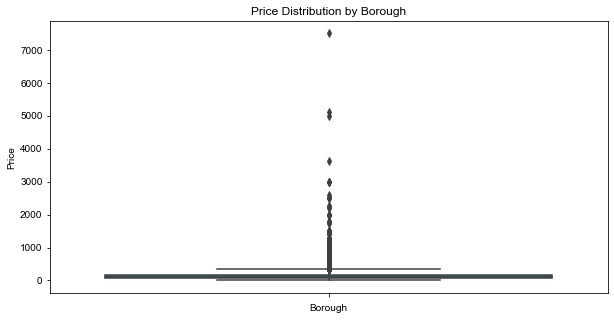

In [76]:
plt.figure(figsize=(10,5)) #mencari outlier
ax = sns.boxplot(y='price', data=inn).set_title('Price Distribution by Borough')
sns.set_theme(style='white')
plt.xlabel('Borough')
plt.ylabel('Price')
plt.show()

In [77]:
lowq = inn['price'].quantile(0.10)
lowq

49.0

In [78]:
# high quantile
highq = inn['price'].quantile(0.90)
highq

250.0

In [79]:
inn = inn.drop(inn[inn.price < lowq].index) #menghapus baris dengan nilai di bawah 0.10

In [80]:
inn = inn.drop(inn[inn.price > highq].index) # menghapus baris dengan nilai di atas 0.90

In [81]:
inn

,listing_id,description,room_type,price,neighborhood_full,host_name,last_review,area,sub_area
0,2595,Skylit Midtown Castle,Entire Home/Apt,225,"Manhattan, Midtown",Jennifer,2021-05-21,Manhattan,Midtown
1,3831,Cozy Entire Floor of Brownstone,Entire Home/Apt,89,"Brooklyn, Clinton Hill",LisaRoxanne,2021-05-07,Brooklyn,Clinton Hill
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire Home/Apt,200,"Manhattan, Murray Hill",Chris,2021-06-22,Manhattan,Murray Hill
3,5178,Large Furnished Room Near B'way,Private Room,79,"Manhattan, Hell's Kitchen",Shunichi,2021-06-24,Manhattan,Hell's Kitchen
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire Home/Apt,150,"Manhattan, Chinatown",Ben,2021-09-06,Manhattan,Chinatown
...,...,...,...,...,...,...,...,...,...
24994,35865346,Spacious Modern Apt. Near JFK Airport and Trains,Entire Home/Apt,129,"Queens, Jamaica",Sharon,2021-07-07,Queens,Jamaica
24995,35865788,Brand new 1Bedroom apartment with private terrace,Entire Home/Apt,175,"Queens, Long Island City",Kasper,2021-06-23,Queens,Long Island City
24996,35866165,A Place to stay in Brooklyn,Entire Home/Apt,150,"Brooklyn, Borough Park",Mord,2021-01-07,Brooklyn,Borough Park
24997,35867917,"Updated Studio apartment, clean and fresh",Entire Home/Apt,99,"Brooklyn, Bushwick",Sadie,2021-05-07,Brooklyn,Bushwick


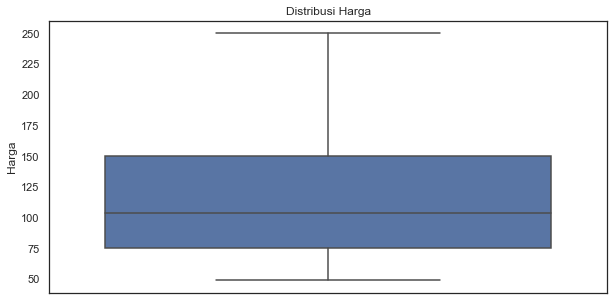

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
ax = sns.boxplot(y='price', data=inn).set_title('Distribusi Harga')
sns.set_theme(style='dark')
plt.ylabel('Harga')
plt.show()


In [83]:
inn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20247 entries, 0 to 24998
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   listing_id         20247 non-null  int64 
 1   description        20247 non-null  object
 2   room_type          20247 non-null  object
 3   price              20247 non-null  int32 
 4   neighborhood_full  20247 non-null  object
 5   host_name          20247 non-null  object
 6   last_review        20247 non-null  object
 7   area               20247 non-null  object
 8   sub_area           20247 non-null  object
dtypes: int32(1), int64(1), object(7)
memory usage: 1.5+ MB


**Export data**

In [84]:
#import ke csv
# inn.to_csv('airBNBNY_cleaned.csv', encoding='utf-8', index=False)
#import ke excel
inn.to_excel('airBNBNY_data_cleaned.xlsx', encoding='utf-8', index=False) 